In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reading train and test CSV files
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')

# Drop data that doesn't have 'sii'
train_df = train_df.dropna(subset=['sii'])

# Drop columns that contain 'PCIAT', except 'PCIAT-PCIAT_Total'
cols_to_drop = [col for col in train_df.columns if 'PCIAT' in col]
train_df = train_df.drop(cols_to_drop, axis=1)
# Drop columns that contain 'Season'
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='Season')))]
test_df = train_df[test_df.columns.drop(list(test_df.filter(regex='Season')))]

train_id = train_df['id']
train_df = train_df.drop(['id'], axis=1)


# Sub select the columns in train_df and test_df
y = train_df['sii']
train_df = train_df.drop(['sii'], axis=1)
# Find columns with real numbers
real_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df_real = train_df[real_columns]
test_df_real = test_df[real_columns]
# train_df = pd.get_dummies(train_df)
# test_id = test_df['id']
# test_df = pd.get_dummies(test_df.drop(['id'], axis=1))

X = train_df_real

# y = train_df['PCIAT-PCIAT_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train = X


# Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

# Standardize the imputed data
scaler = StandardScaler()  # or MinMaxScaler() if you prefer scaling between 0 and 1
X_train_imputed = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_imputed = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores = cross_val_score(knn_clf, X_train_imputed, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.55936073 0.54794521 0.55707763 0.55377574 0.56979405]
Mean cross-validation score: 0.5575906711388358


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=9)

# Fit the KNN classifier
knn_clf.fit(X_train_imputed, y_train)

# Predict the classes of X_test_imputed
y_pred = knn_clf.predict(X_test_imputed)

# Compute the cohen kappa score with quadratic weights
kappa_score = cohen_kappa_score(y_test, y_pred, weights="quadratic")

print(f"Cohen Kappa Score (Quadratic Weights): {kappa_score}")

Cohen Kappa Score (Quadratic Weights): 0.2458408090034251


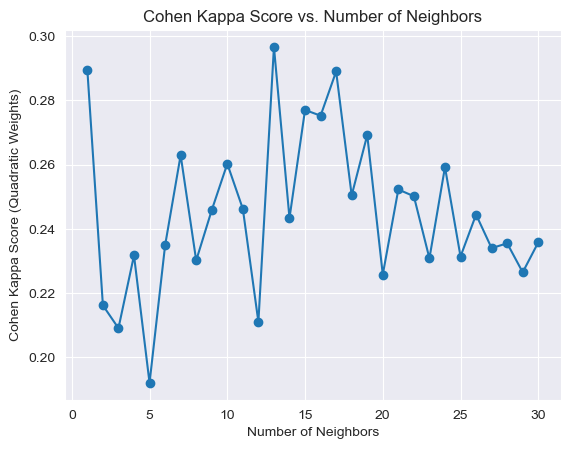

In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score

kappa_scores = []
n_neighbors_range = range(1, 31)

for n_neighbors in n_neighbors_range:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train_imputed, y_train)
    y_pred = knn_clf.predict(X_test_imputed)
    kappa_score = cohen_kappa_score(y_test, y_pred, weights="quadratic")
    kappa_scores.append(kappa_score)

plt.plot(n_neighbors_range, kappa_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cohen Kappa Score (Quadratic Weights)')
plt.title('Cohen Kappa Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

True

In [8]:
common_ids = set(train_id).intersection(set(test_id))
print(common_ids)

{'1e87baed', '5dad24ff', '9bc60f80', 'a6969e1a', '5a313293', '90a37530', '0a4b1425', 'f13cb65e', 'c706a54d', 'f4d2f5af', '8f112082', '7d927bdf', '0b7d9da6', 'e21255e2', '58de61f0', '593b5cfa', '7c6ca1d4', '5cd83147', 'f240387a', '77e460ce', 'bbbd61c9', '860f4f9c', '6d855495', '0bd89878', '32d262c2', '8e24b103', 'c9e419e7', 'b9d3616c', '164edc75', '788268a4', 'bb0d7d92', '1429abf1', '650bf252', '646a4c0e', '6a837387', 'beafa6f9', '7f44236f', '6a2c6073', '580a30c5', 'a7639eb5', '41d48900', 'b2a73566', 'd19e1025', '3e398bf9', 'ba158a9c', '06ec8be3', '9a7e4c38', '3cc9cfa6', '76c9bf0e', '16bf9efe', '4da4aba2', 'b55f7943', '5779f2e9', 'f817f33a', '1b329556', '4280076d', '4f059221', 'e362108f', 'e7db9aef', '5c2c136d', '3983d3cd', '7d22cd0a', '2ac0bd9f', '56443aba', '281174c9', '8d8b8553', '067de065', 'b08f0ca4', '5eb063e0', '05bbed1b', 'ff18b749', '668a2fea', '2cd9b5a3', '785d0663', 'e1ea8dd7', 'a1942b0b', 'd3bf6d28', '73ffa609', '82923551', 'b308c03e', 'dfaa2a59', '5c186496', 'ebf30e46', '30

In [9]:
X_test_imputed.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,-1.528487,-0.757178,-1.274367,-0.361374,-1.357787,-0.862795,-1.026320,-0.595857,-0.213724,-0.387307,...,-0.203773,-0.198635,-0.336399,-0.243487,-0.210242,0.466083,0.311477,-0.459776,-0.466971,1.842435
1,-0.361407,-0.757178,-0.918954,-0.892049,-1.084372,-0.974758,-1.104083,0.381580,-0.886336,0.292919,...,-0.273681,-0.097661,-0.330795,-0.299798,-0.260862,-1.157742,-0.348605,0.515690,0.509631,-0.949449
2,-0.069637,1.320694,0.502702,-0.404068,0.077646,-0.284321,-0.015405,-0.370295,0.907296,-0.007181,...,-0.101608,-0.077470,-0.137307,-0.113802,-0.096105,0.141318,-0.609567,-0.291592,-0.282209,0.911807
3,-0.361407,-0.757178,0.502702,-0.097126,0.009292,-0.144367,-0.248693,-0.746232,1.131500,-0.007181,...,-0.081029,-0.067678,-0.125561,-0.148896,-0.090730,0.508444,-0.178211,-0.997964,-0.994864,-0.949449
4,0.805674,1.320694,-1.363221,0.647536,0.487769,0.569395,-0.170930,-0.746232,-0.662132,-0.907480,...,-0.029416,0.000810,0.093159,-0.027557,0.063131,-0.945939,2.368476,-0.089772,-0.123841,-0.949449


In [10]:
X_train_imputed.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,-1.528487,-0.757178,-1.274367,-0.361374,-1.357787,-0.862795,-1.026320,-0.595857,-0.213724,-0.387307,...,-0.203773,-0.198635,-0.336399,-0.243487,-0.210242,0.466083,0.311477,-0.459776,-0.466971,1.842435
1,-0.361407,-0.757178,-0.918954,-0.892049,-1.084372,-0.974758,-1.104083,0.381580,-0.886336,0.292919,...,-0.273681,-0.097661,-0.330795,-0.299798,-0.260862,-1.157742,-0.348605,0.515690,0.509631,-0.949449
2,-0.069637,1.320694,0.502702,-0.404068,0.077646,-0.284321,-0.015405,-0.370295,0.907296,-0.007181,...,-0.101608,-0.077470,-0.137307,-0.113802,-0.096105,0.141318,-0.609567,-0.291592,-0.282209,0.911807
3,-0.361407,-0.757178,0.502702,-0.097126,0.009292,-0.144367,-0.248693,-0.746232,1.131500,-0.007181,...,-0.081029,-0.067678,-0.125561,-0.148896,-0.090730,0.508444,-0.178211,-0.997964,-0.994864,-0.949449
4,0.805674,1.320694,-1.363221,0.647536,0.487769,0.569395,-0.170930,-0.746232,-0.662132,-0.907480,...,-0.029416,0.000810,0.093159,-0.027557,0.063131,-0.945939,2.368476,-0.089772,-0.123841,-0.949449


In [11]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_imputed, y_train)

# Make predictions on the training data
y_train_pred = log_reg_model.predict(X_train_imputed)

In [12]:
y_test_pred = log_reg_model.predict(X_test_imputed)

In [13]:
print(y_test_pred[0:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reading train and test CSV files
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')
sample = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/sample_submission.csv')

# Drop data that doesn't have 'sii'
train_df = train_df.dropna(subset=['sii'])
y = train_df['PCIAT-PCIAT_Total']
# Drop columns that contain 'PCIAT', because this is not in the test dataset
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='PCIAT')))]
# Drop columns that contain 'Season'
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='Season')))]
test_df = test_df[test_df.columns.drop(list(test_df.filter(regex='Season')))]

train_df = train_df.drop(['id'], axis=1)
test_df_df = test_df['id']
test_df = test_df.drop(['id'], axis=1)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

X = train_df.drop(['sii'], axis=1)
y_sii = train_df['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=43)
# X_train = X
# y_train = y

# X_test = test_df
# Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
X_test_imputed_test_set = pd.DataFrame(knn_imputer.transform(test_df), columns=test_df.columns)

# Standardize the imputed data
scaler = StandardScaler()  # or MinMaxScaler() if you prefer scaling between 0 and 1
X_train_imputed = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_imputed = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)
X_test_imputed_test_set = pd.DataFrame(scaler.transform(X_test_imputed_test_set), columns=X_test_imputed_test_set.columns)

In [23]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_imputed, y_train)

# Make predictions on the training data
y_train_pred = lin_reg_model.predict(X_train_imputed)

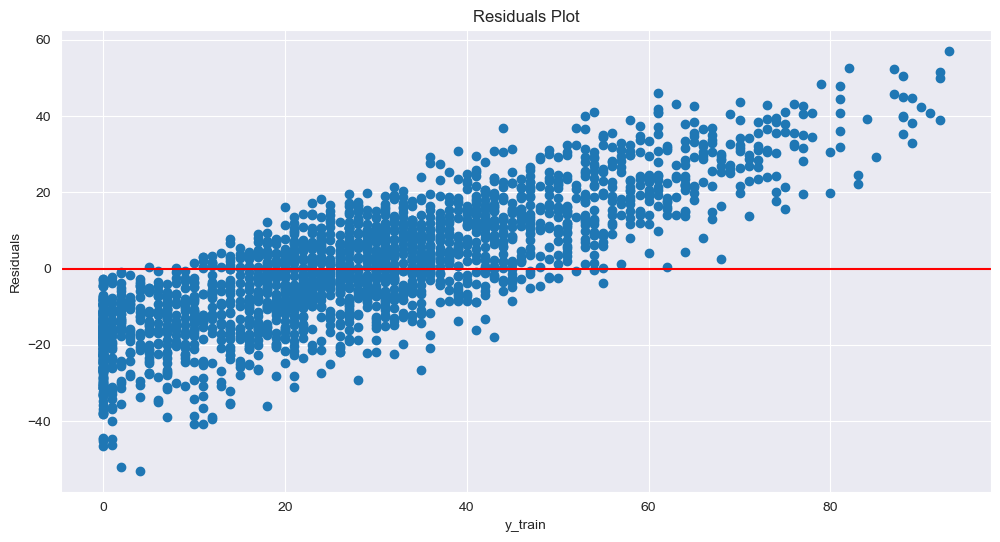

In [24]:
import matplotlib.pyplot as plt

# Plot the residuals (y_train - y_train_pred)
plt.figure(figsize=(12, 6))
plt.plot(y_train.values, y_train - y_train_pred, 'o')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_train')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [51]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
test_vals = lin_reg_model.predict(X_test_imputed)
test_vals = test_vals
test_vals_sii = np.select([test_vals <= 30, test_vals <= 49, test_vals <= 79], [0, 1, 2], default=3)
y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
cohen_kappa_score(y_test_sii, test_vals_sii, weights='quadratic')

0.3904830813756581

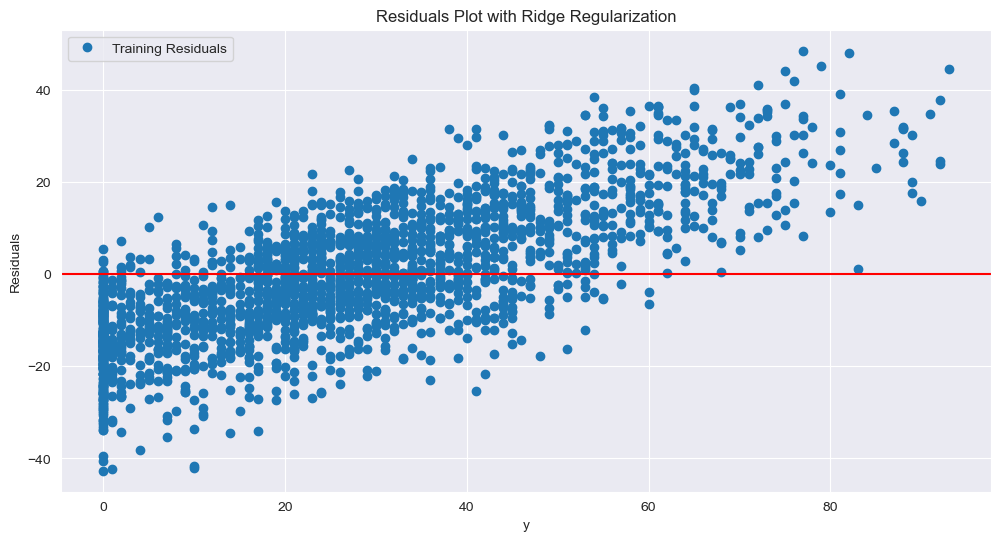

In [53]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
# Example of adding polynomial features with Ridge regularization
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('ridge_regression', Ridge(alpha=100.0))  # Adjust alpha to control regularization strength
])
poly_model.fit(X_train_imputed, y_train)
y_train_pred_poly = poly_model.predict(X_train_imputed)

# Evaluate on the test set
plt.figure(figsize=(12, 6))
plt.plot(y_train.values, y_train - y_train_pred_poly, 'o', label="Training Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.title('Residuals Plot with Ridge Regularization')
plt.legend()
plt.show()

In [54]:
import numpy as np
y_test_pred_poly = poly_model.predict(X_test_imputed)
y_pred_sii = np.select([y_test_pred_poly <= 30, y_test_pred_poly <= 49, y_test_pred_poly <= 79], [0, 1, 2], default=3)
y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')

0.3091648388483651

In [10]:
# Save predictions to a CSV file
sample['sii'] = y_pred_sii
sample.to_csv('submission.csv', index=False)

ValueError: Length of values (548) does not match length of index (20)

In [25]:
sample

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,3
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,3


Cohen Kappa Score (Quadratic Weights): 0.3091648388483651


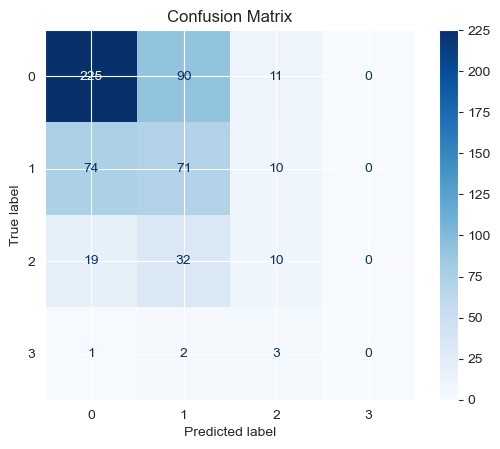

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score

y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
kappa_score = cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')
print(f"Cohen Kappa Score (Quadratic Weights): {kappa_score}")
# Assuming y_test_sii and y_pred_sii are already defined and available
cm = confusion_matrix(y_test_sii, y_pred_sii)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Training R² Score: 0.9362
Adjusted R² Score: 0.9347


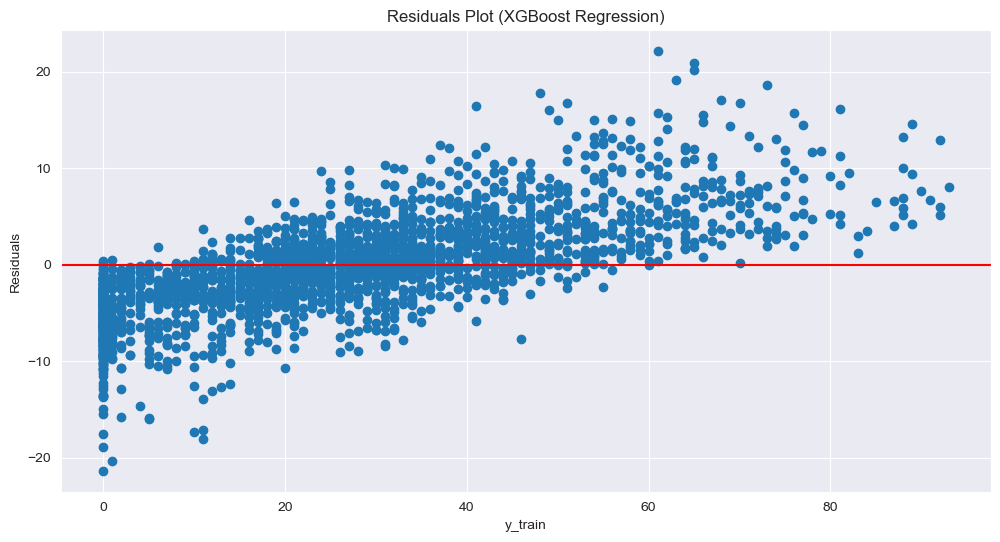

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the XGBoost regressor model
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=7,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train_imputed, y_train)

# Make predictions on the training data
y_train_pred = xgb_model.predict(X_train_imputed)

# Evaluate standard R² score
r2 = r2_score(y_train, y_train_pred)

# Calculate Adjusted R²
n = X_train_imputed.shape[0]  # Number of samples
p = X_train_imputed.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Training R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

# Plot residuals for the training data
plt.figure(figsize=(12, 6))
plt.plot(y_train.values, y_train - y_train_pred, 'o')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_train')
plt.ylabel('Residuals')
plt.title('Residuals Plot (XGBoost Regression)')
plt.show()


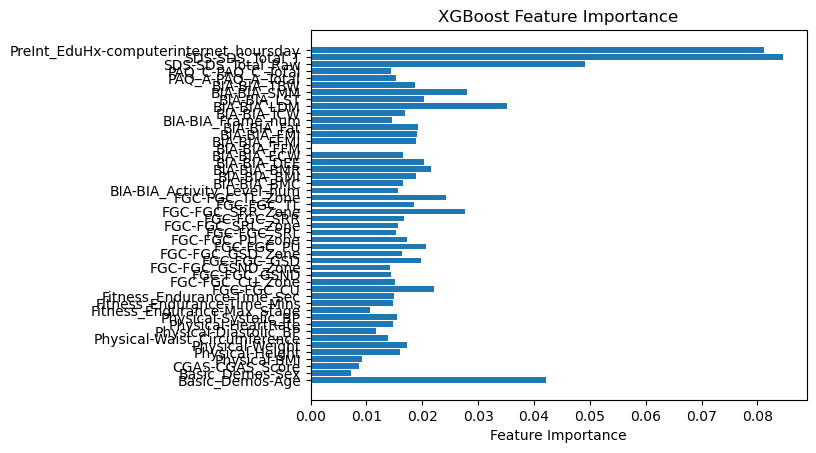

In [58]:
plt.barh(X_train_imputed.columns, xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


In [57]:
y_test_pred = xgb_model.predict(X_test_imputed)
y_pred_sii = np.select([y_test_pred <= 30, y_test_pred <= 49, y_test_pred <= 79], [0, 1, 2], default=3)
y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')

0.3843104896341374

Cohen Kappa Score (Quadratic Weights): 0.3843104896341374


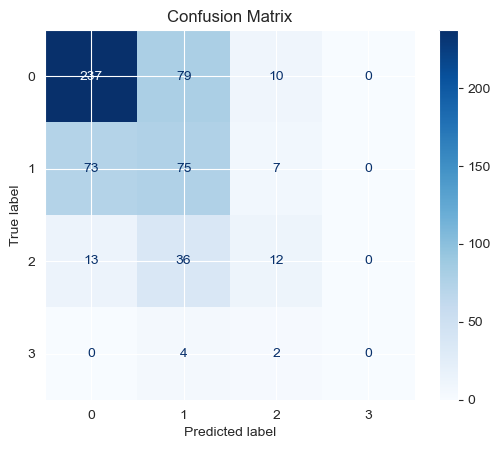

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score

y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
kappa_score = cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')
print(f"Cohen Kappa Score (Quadratic Weights): {kappa_score}")
# Assuming y_test_sii and y_pred_sii are already defined and available
cm = confusion_matrix(y_test_sii, y_pred_sii)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [61]:
y_test_pred = xgb_model.predict(X_test_imputed_test_set)
y_pred_sii = np.select([y_test_pred <= 30, y_test_pred <= 49, y_test_pred <= 79], [0, 1, 2], default=3)
y_pred_sii

array([2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1])

Random Forest:
  - Training MSE: 43.4696
  - Training R²: 0.8957

XGBoost:
  - Training MSE: 96.7205
  - Training R²: 0.7680

Averaged Ensemble:
  - Test MSE: 296.5349
  - Test R²: 0.2569


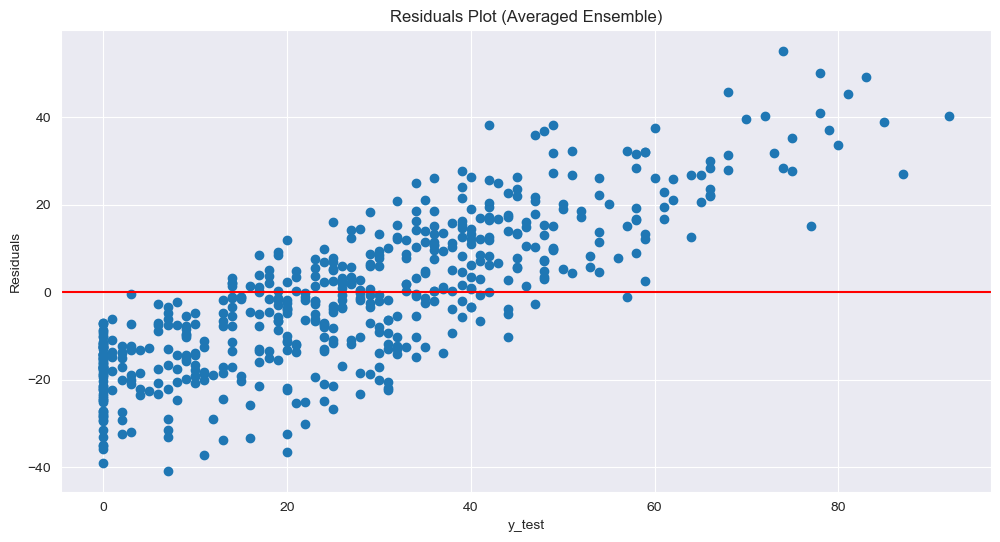

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the regressors
regressors = {
    # "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Train each regressor and make predictions
predictions = []
for name, model in regressors.items():
    # Train the model
    model.fit(X_train_imputed, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_imputed)
    predictions.append(y_test_pred)
    
    # Evaluate individual models
    mse = mean_squared_error(y_train, model.predict(X_train_imputed))
    r2 = r2_score(y_train, model.predict(X_train_imputed))
    print(f"{name}:")
    print(f"  - Training MSE: {mse:.4f}")
    print(f"  - Training R²: {r2:.4f}")
    print()

# Calculate the average of predictions
y_test_pred_avg = np.mean(predictions, axis=0)

# Evaluate the ensemble predictions
mse_avg = mean_squared_error(y_test, y_test_pred_avg)
r2_avg = r2_score(y_test, y_test_pred_avg)

print("Averaged Ensemble:")
print(f"  - Test MSE: {mse_avg:.4f}")
print(f"  - Test R²: {r2_avg:.4f}")

# Plot residuals for the ensemble
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, y_test - y_test_pred_avg, 'o')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Averaged Ensemble)')
plt.show()


In [62]:
y_pred_sii = np.select([y_test_pred_avg <= 30, y_test_pred_avg <= 49, y_test_pred_avg <= 79], [0, 1, 2], default=3)
y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')

0.3981558455425307

Cohen Kappa Score (Quadratic Weights): 0.39936867948792887


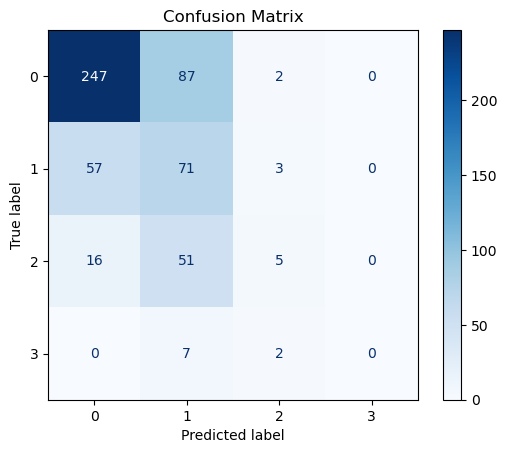

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score

y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
kappa_score = cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')
print(f"Cohen Kappa Score (Quadratic Weights): {kappa_score}")
# Assuming y_test_sii and y_pred_sii are already defined and available
cm = confusion_matrix(y_test_sii, y_pred_sii)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

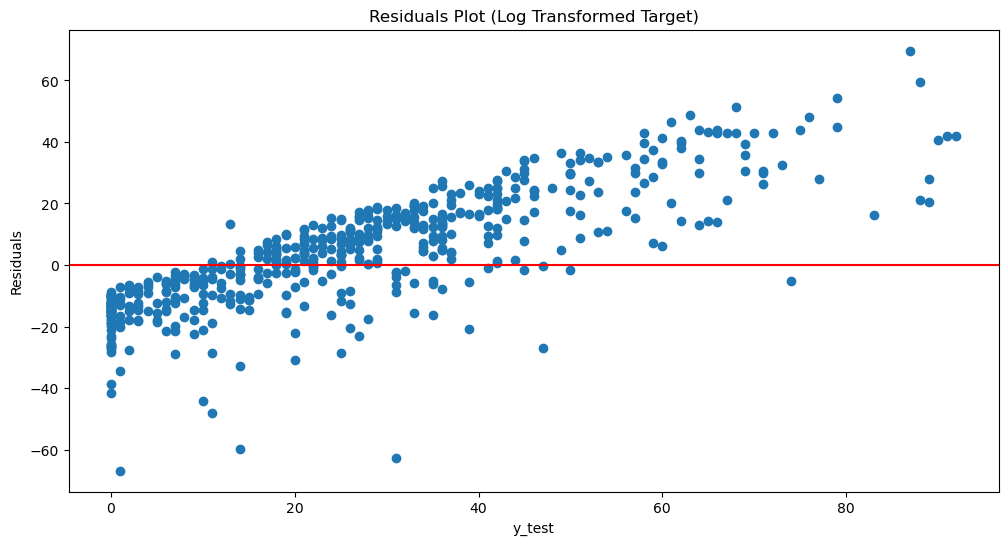

In [103]:
import numpy as np

# Log transform target
y_train_log = np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(y_train))))))



from scipy.stats import zscore
import numpy as np

# Calculate z-scores
z_scores = np.abs(zscore(y_train_log))

# Remove rows where z-score > 3
filtered_indices = np.where(z_scores <= 2.7)[0]
y_train_log_filtered = y_train_log.iloc[filtered_indices]
X_train_imputed_filtered = X_train_imputed.iloc[filtered_indices]


y_test_log = np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(y_test))))))

# Train and predict
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_imputed_filtered, y_train_log_filtered)
y_train_pred_log = lin_reg_model.predict(X_train_imputed_filtered)
y_test_pred_log = lin_reg_model.predict(X_test_imputed)
y_test_set_pred_log = lin_reg_model.predict(X_test_imputed_test_set)

# Reverse log transformation for predictions
y_test_pred = np.expm1(np.expm1(np.expm1(np.expm1(np.expm1(np.expm1(y_test_pred_log))))))
y_test_set_pred = np.expm1(np.expm1(np.expm1(np.expm1(np.expm1(np.expm1(y_test_set_pred_log))))))

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, y_test - y_test_pred, 'o')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Log Transformed Target)')
plt.show()


In [104]:
y_pred_sii = np.select([y_test_pred <= 30, y_test_pred <= 49, y_test_pred <= 79], [0, 1, 2], default=3)
y_pred_sii

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

Cohen Kappa Score (Quadratic Weights): 0.32492434589325414


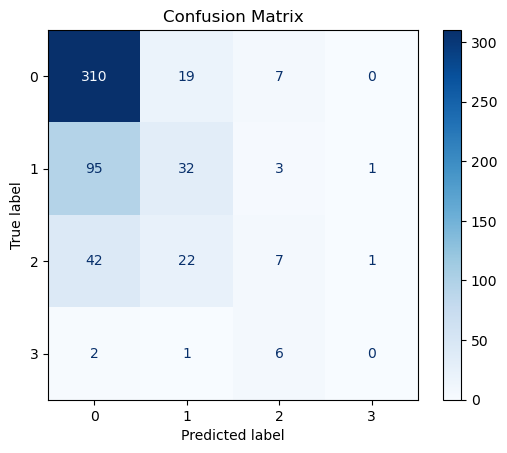

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score

y_test_sii = np.select([y_test <= 30, y_test <= 49, y_test <= 79], [0, 1, 2], default=3)
kappa_score = cohen_kappa_score(y_test_sii, y_pred_sii, weights='quadratic')
print(f"Cohen Kappa Score (Quadratic Weights): {kappa_score}")
# Assuming y_test_sii and y_pred_sii are already defined and available
cm = confusion_matrix(y_test_sii, y_pred_sii)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [106]:
y_pred_sii = np.select([y_test_set_pred <= 30, y_test_set_pred <= 49, y_test_set_pred <= 79], [0, 1, 2], default=3)
y_pred_sii

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

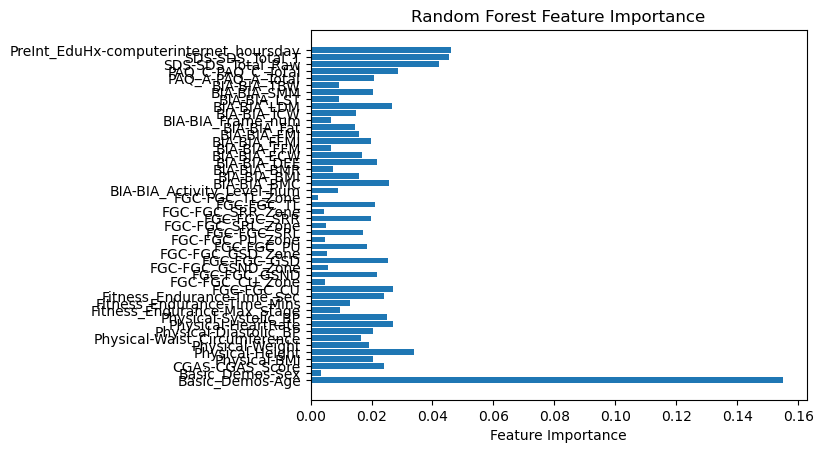

In [107]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
plt.barh(X_train_imputed.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()
